## Import packages & dependencies
Here only package needed is Numpy as we're implementing from scratch

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Setup Toy Datset
First I'm going to simulate a dataset, here the popular XOR table as the dataset and try to solve a binary classification problem. We use the XOR problem, as it's famous for:
1. It cannot be solved by a single layer perceptron
2. It requires a hidden layer

In [2]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])

## Visualizing the XOR dataset (scatter plot)
This dataset lives in 2D, so a simple scatter plot is enough.
We’ll use Matplotlib.

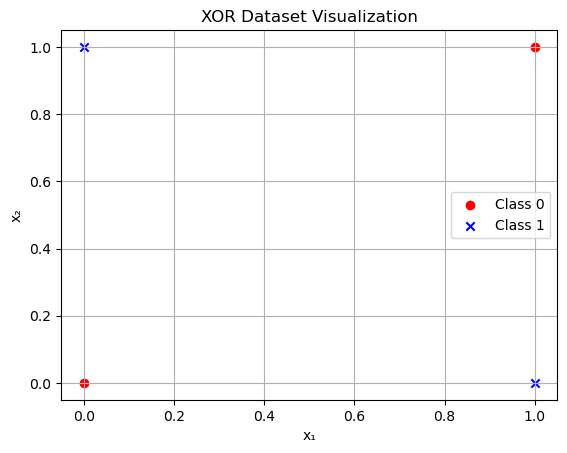

In [10]:
y_flat = y.ravel()   # or y.flatten()

# Separate classes
class_0 = X[y_flat == 0]
class_1 = X[y_flat == 1]

# Plot
plt.scatter(class_0[:, 0], class_0[:, 1],
            color="red", marker="o", label="Class 0")

plt.scatter(class_1[:, 0], class_1[:, 1],
            color="blue", marker="x", label="Class 1")

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("XOR Dataset Visualization")
plt.legend()
plt.grid(True)
plt.show()

## Initialize parameters

In [4]:
np.random.seed(42) # Random generator from numpy, 42 is just an arbitrary number

W1 = np.random.randn(2,2) # Hidden layer weights : (2x2) matrix
b1 = np.random.randn(1,2) # Hidden layer biases : (1x2) matrix

W2 = np.random.randn(2,1) # Output layer weights: (2x1) matrix
b2 = np.random.randn(1,1) # Output layer bias : (1x1) matrix, i.e single value

## Activation Functions

In [5]:
def sigmoid(z): # Sigmoid activation function for each layer
    return 1/(1 + np.exp(-z))

def sig_derivative(a): # Sigmoid activation function derivative for backpropagation
    return a * (1 - a)

## Training Loop
This is the step in which the ANN model is trained. It comprises of three parts: forward pass, calculate loss, backward pass (BP), and then Updation. These are repeated according to the set Hyperparameters so the parameters (weights & biases) adjust themselves to the optimal value for the model thereby minimizing the loss.

In [6]:
for epoch in range(1000):
    # Forward
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # Loss
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    # Backprop
    dL_dyhat = y_hat - y
    dW2 = a1.T @ dL_dyhat
    db2 = np.sum(dL_dyhat, axis=0, keepdims=True)

    da1 = dL_dyhat @ W2.T
    dz1 = da1 * sig_derivative(a1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    learning_rate = 0.1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.7983
Epoch 100, Loss: 0.6941
Epoch 200, Loss: 0.6895
Epoch 300, Loss: 0.6763
Epoch 400, Loss: 0.6496
Epoch 500, Loss: 0.6032
Epoch 600, Loss: 0.5461
Epoch 700, Loss: 0.4961
Epoch 800, Loss: 0.4558
Epoch 900, Loss: 0.3980


## Final Prediction

In [7]:
print("Predictions:")
print(np.round(y_hat))

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


## Visualizing hidden neuron activations

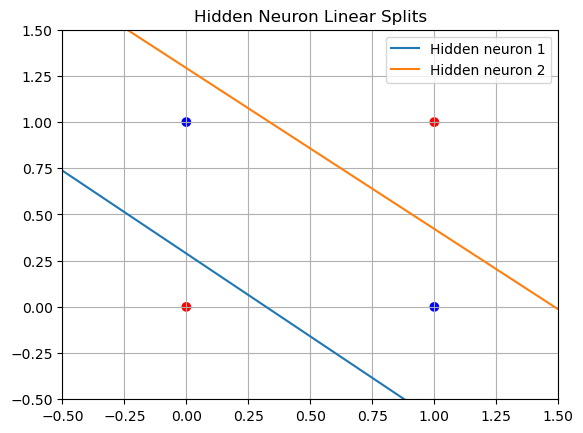

In [12]:
x = np.linspace(-0.5, 1.5, 200)

for i in range(2):
    w1, w2 = W1[0, i], W1[1, i]
    b = b1[0, i]

    y = -(w1 * x + b) / w2
    plt.plot(x, y, label=f"Hidden neuron {i+1}")

plt.scatter([0,0,1,1], [0,1,0,1], c=['red','blue','blue','red'])
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.legend()
plt.title("Hidden Neuron Linear Splits")
plt.grid(True)
plt.show()


## Visualize activation intensity
How each neuron splits the plane!

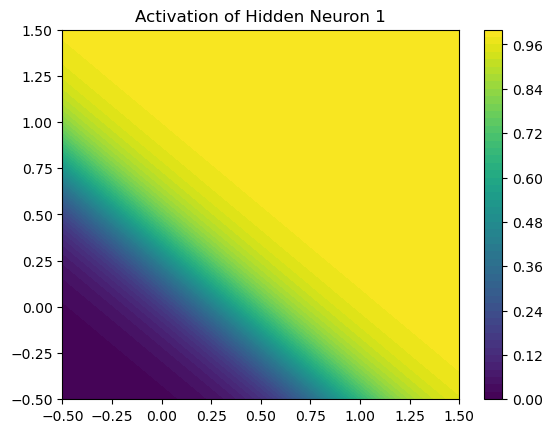

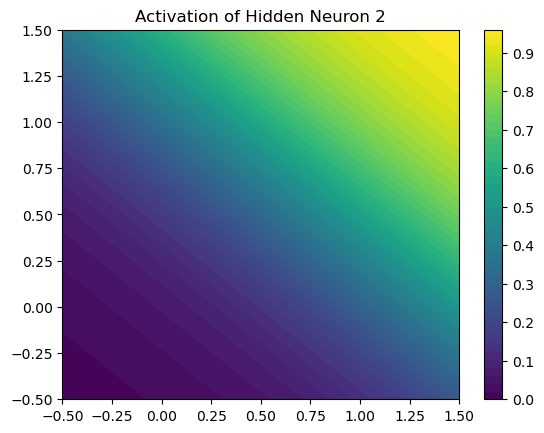

In [13]:
xx, yy = np.meshgrid(
    np.linspace(-0.5, 1.5, 200),
    np.linspace(-0.5, 1.5, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]

z1 = grid @ W1 + b1
a1 = 1 / (1 + np.exp(-z1))

for i in range(2):
    plt.contourf(xx, yy, a1[:, i].reshape(xx.shape),
                 levels=50, cmap="viridis")
    plt.colorbar()
    plt.title(f"Activation of Hidden Neuron {i+1}")
    plt.show()


## Animate decision boundary over training

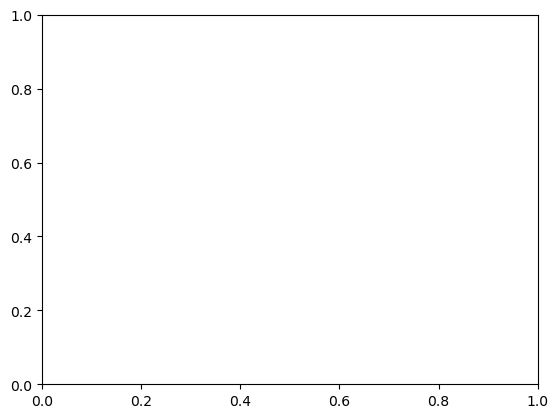

In [18]:
# from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def update(epoch):
    global W1, b1, W2, b2

    # Forward
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # Backprop
    d = y_hat - y
    dW2 = a1.T @ d
    db2 = np.sum(d, axis=0, keepdims=True)

    dz1 = (d @ W2.T) * a1 * (1 - a1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W2 -= 0.1 * dW2
    b2 -= 0.1 * db2
    W1 -= 0.1 * dW1
    b1 -= 0.1 * db1

    ax.clear()

    xx, yy = np.meshgrid(
        np.linspace(-0.5, 1.5, 200),
        np.linspace(-0.5, 1.5, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    z1 = grid @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    Z = sigmoid(z2).reshape(xx.shape)

    ax.contourf(xx, yy, Z, levels=50, cmap="coolwarm")
    ax.scatter([0,0,1,1], [0,1,0,1], c=['red','blue','blue','red'])
    ax.set_title(f"Epoch {epoch}")

ani = FuncAnimation(fig, update, frames=200)
plt.show()
# HTML(ani.to_jshtml())
# ani.save("decision_boundary.gif", fps=20)


## Visualizing the ANN decision boundary

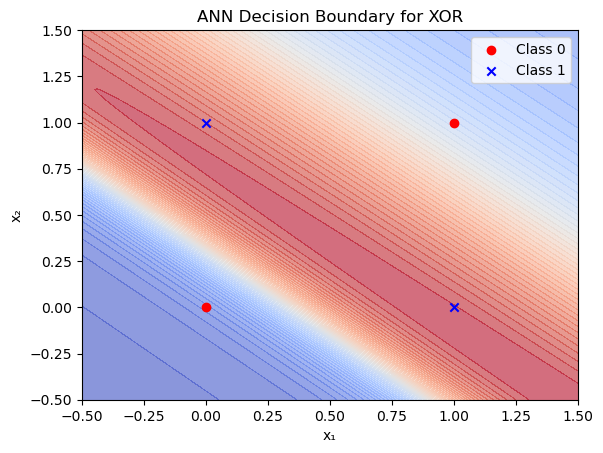

In [11]:
# Create mesh grid
xx, yy = np.meshgrid(
    np.linspace(-0.5, 1.5, 200),
    np.linspace(-0.5, 1.5, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# Forward pass through trained ANN
z1 = grid @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
preds = sigmoid(z2)

Z = preds.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=50, cmap="coolwarm", alpha=0.6)
plt.scatter(class_0[:, 0], class_0[:, 1], color="red", marker="o", label="Class 0")
plt.scatter(class_1[:, 0], class_1[:, 1], color="blue", marker="x", label="Class 1")

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("ANN Decision Boundary for XOR")
plt.legend()
plt.show()
